<img src=https://upload.wikimedia.org/wikipedia/commons/1/19/UDLA-logo-oficial.jpg width=400/>

# Fundamentos de Data Science con Python
**Dr. Julio Lopez-Nunez (2025)**

## **Sesión 4 – Introducción a Deep Learning**  
**Duración total estimada:** 120 min  

## ⏱️ Introducción y objetivos (15 min)

**Objetivos de la sesión**
- Redes neuronales artificiales
- Capas, neuronas y funciones de activación
- Forward pass, error y entrenamiento (backpropagation)
- Función de pérdida y accuracy
- Diferencia entre train y test (generalización / overfitting)

> En esta sesion utilizaremos el dataset **MNIST**, que contiene imágenes de dígitos escritos a mano (0–9).

## ¿Cuántas capas y cuántas neuronas usar?

### 1. ¿Cuántas capas ocultas usar?
- **Problemas simples (tabulares)** → 1 capa oculta  
- **Problemas más complejos** → 2–4 capas  
- **Problemas muy complejos (imágenes, texto, audio)** → muchas capas  

Más capas = más capacidad, pero **mayor riesgo de overfitting**.

---

### 2. ¿Cuántas neuronas por capa?
- Primera capa: **entre 2× y 3× el número de entradas**  
- Siguientes capas: **igual o menos neuronas**  
- Capa de salida:  
  - **1 neurona** si es regresión  
  - **n neuronas** si es clasificación  

Más neuronas = más flexibilidad, pero también **más riesgo de memorizar el ruido**.

---

### 3. ¿Por qué usamos ReLU?
- Introduce no linealidad  
- Permite aprender curvas complejas  
- Es rápida y estable para entrenamiento

---


## Underfitting & Overfitting

En este notebook se presentan **tres redes neuronales**, diseñadas para:

### 🔹 Modelo 1: **Lineal (sin capa oculta)**
- No tiene activación → equivalente a regresión lineal  
- No puede aprender relaciones no lineales  
- Ilustra **underfitting** extremo  

*sin activación la red no aprende la curva*.

---

### 🔹 Modelo 2: **Red pequeña (1 capa oculta, pocas neuronas)**
- Una capa oculta para problemas simples tabulares  
- Neuronas suficientes para aprender la forma general  
- Buen equilibrio entre bias y varianza  

Representa un **modelo razonable** para este tipo de datos.

---

### 🔹 Modelo 3: **Red grande (varias capas ocultas + muchas neuronas)**
- Aumentamos significativamente la capacidad del modelo  
- Puede ajustarse demasiado al ruido del conjunto de entrenamiento  
- Ilustra el **overfitting**  

Ademas, es posible observar diferencias claras entre **train** y **test**.

---


## Recordatorio

Entradas ───► [ Capa oculta 1 ] ───► [ Capa oculta 2 ] ───► ... ───► [ Salida ]

- Más capas → más capacidad → riesgo de overfitting
- Más neuronas → mayor flexibilidad → riesgo de memorizar el ruido
- Sin activación → la red es equivalente a regresión lineal

## ⏱️ Actividad práctica (50–60 min)

In [ ]:
# PASO 1
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
# PASO 2
# Cargar los datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Forma de x_train:", x_train.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de x_test:", x_test.shape)
print("Valores posibles de las etiquetas:", np.unique(y_train))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Forma de x_train: (60000, 28, 28)
Forma de y_train: (60000,)
Forma de x_test: (10000, 28, 28)
Valores posibles de las etiquetas: [0 1 2 3 4 5 6 7 8 9]


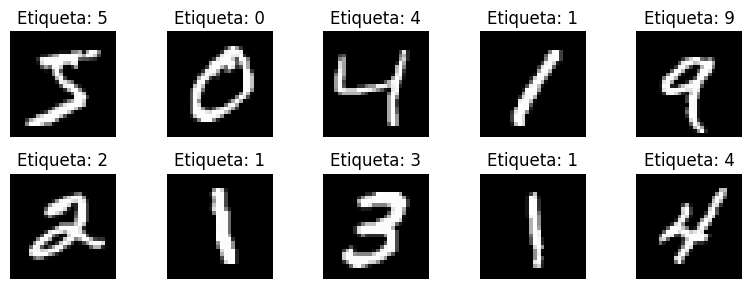

In [ ]:
# Mostrar algunas imágenes de ejemplo
plt.figure(figsize=(8, 3))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Etiqueta: {y_train[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


In [ ]:
# PASO 3
# Normalizar: pasar de [0, 255] a [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Convertir etiquetas a one-hot encoding
num_clases = 10
y_train_cat = to_categorical(y_train, num_clases)
y_test_cat  = to_categorical(y_test, num_clases)

print("Nueva forma de x_train:", x_train.shape)
print("Nueva forma de y_train_cat:", y_train_cat.shape)


Nueva forma de x_train: (60000, 28, 28)
Nueva forma de y_train_cat: (60000, 10)


In [ ]:
# PASO 4
# Definir Red Neuronal
model = Sequential([
    # Capa que "aplana" la imagen 28x28 a un vector de 784
    Flatten(input_shape=(28, 28)),

    # Capa oculta: neuronas densamente conectadas
    Dense(128, activation="relu"),  # función de activación ReLU

    # Capa de salida: 10 neuronas (una por dígito), activación softmax
    Dense(num_clases, activation="softmax")
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# PASO 5
# Compilar el Modelo
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",  # para clasificación multiclase
    metrics=["accuracy"]
)



In [ ]:
# PASO 6
# Entrenar el Modelo
history = model.fit(
    x_train, y_train_cat,
    epochs=10,
    batch_size=32,
    validation_split=0.2,   # 20% de train se usa para validación
    verbose=1
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8658 - loss: 0.4687 - val_accuracy: 0.9562 - val_loss: 0.1563
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9598 - loss: 0.1390 - val_accuracy: 0.9647 - val_loss: 0.1155
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9724 - loss: 0.0903 - val_accuracy: 0.9693 - val_loss: 0.1007
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9800 - loss: 0.0633 - val_accuracy: 0.9717 - val_loss: 0.0945
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9862 - loss: 0.0461 - val_accuracy: 0.9723 - val_loss: 0.0907
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9882 - loss: 0.0370 - val_accuracy: 0.9731 - val_loss: 0.0969
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9917 - loss: 0.0296 - val_accuracy: 0.9735 - val_loss: 0.0944
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9921 - loss: 0.0244 -

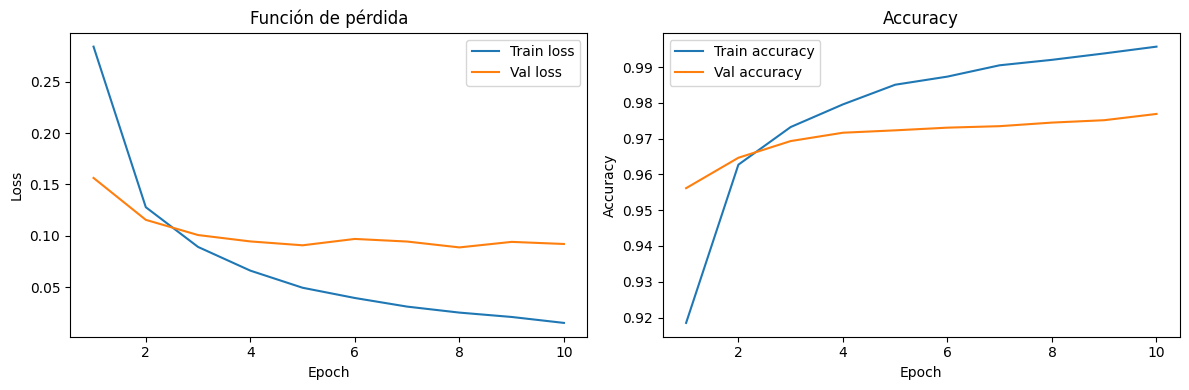

In [ ]:
# PASO 7
# Graficar la pérdida (loss) y accuracy

# Historial de entrenamiento
hist = history.history

epochs = range(1, len(hist["loss"]) + 1)

plt.figure(figsize=(12, 4))

# Gráfico de pérdida
plt.subplot(1, 2, 1)
plt.plot(epochs, hist["loss"], label="Train loss")
plt.plot(epochs, hist["val_loss"], label="Val loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Función de pérdida")
plt.legend()

# Gráfico de accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, hist["accuracy"], label="Train accuracy")
plt.plot(epochs, hist["val_accuracy"], label="Val accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# PASO 8
# Evaluar en el conjunto de prueba (test)

test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Loss en test: {test_loss:.4f}")
print(f"Accuracy en test: {test_acc:.4f}")

Loss en test: 0.0837
Accuracy en test: 0.9760


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


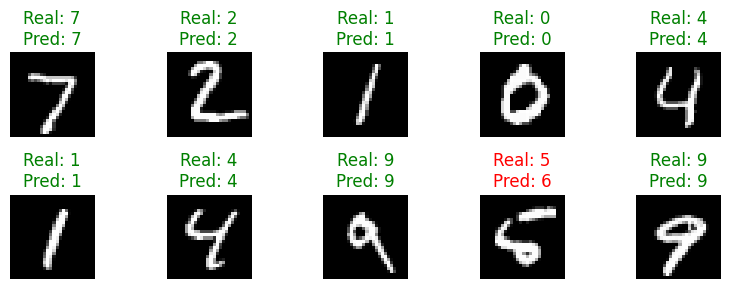

In [ ]:
# PASO 9
# Obtener predicciones
pred_probs = model.predict(x_test)
pred_labels = np.argmax(pred_probs, axis=1)

# Mostrar algunas imágenes con su predicción
num_imagenes = 10
plt.figure(figsize=(8, 3))
for i in range(num_imagenes):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i], cmap="gray")
    plt.axis("off")
    true_label = y_test[i]
    pred_label = pred_labels[i]
    color = "green" if true_label == pred_label else "red"
    plt.title(f"Real: {true_label}\nPred: {pred_label}", color=color)

plt.tight_layout()
plt.show()

## ⏱️ Reflexión Final
¿Qué entendemos ahora por “aprendizaje”?

¿Por qué decimos que el proceso es “casi artesanal”?